In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df1 = pd.read_csv(r"D:\tharu\My Projects\HPN\NestWorth\model\Data\bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape


(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# noisy data
df2 = df1.drop(['area_type','society','availability','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['Bedroom']=df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21360\2653233942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bedroom']=df3['size'].apply(lambda x : int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return(float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [14]:
convert_sqft_to_num('2166')

2166.0

In [15]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
Bedroom               4
Name: 30, dtype: object

In [17]:
df4.head()

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(df5.location.unique())

1304

In [20]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
len(location_stats[location_stats<=10])

1052

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [23]:
# apply(lambda x: x.strip()) → Removes any leading or trailing spaces in the 'location' column.
# Ensures consistency in location names (e.g., " New York" becomes "New York")
#df5.groupby('location') → Groups the DataFrame by the 'location' column.
#['location'].agg('count') → Counts how many times each location appears

df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [24]:
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5[df5.total_sqft/df5.Bedroom<300].head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
df5.shape

(13246, 7)

In [27]:
#df5.total_sqft / df5.Bedroom < 300 →
#Creates a condition to check if square feet per bedroom is less than 300.

#~(...) (Tilde ~) →
#Negates the condition, meaning it keeps only rows where sqft/bedroom is 300 or more.

#df5[...] →
#Selects and stores the filtered DataFrame in df6.

#df6.shape →
#Returns the number of rows and columns in df6.

df6 = df5[~(df5.total_sqft/df5.Bedroom < 300)]
df6.shape

(12502, 7)

In [28]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
#Create an empty DataFrame (df_out) → This will store the cleaned data.

#Group by 'location' →
    #The function processes each location separately.
    #This ensures we remove outliers relative to each location, not the entire dataset.

#Calculate mean and standard deviation of price_per_sqft for each location.

#Filter data using standard deviation:
    #Keeps only values within one standard deviation of the mean.
    #Removes extreme outliers (both low and high[range ekt wada godak wadi values]).

#Concatenate the filtered data into df_out.

#Return the cleaned DataFrame (df_out).

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

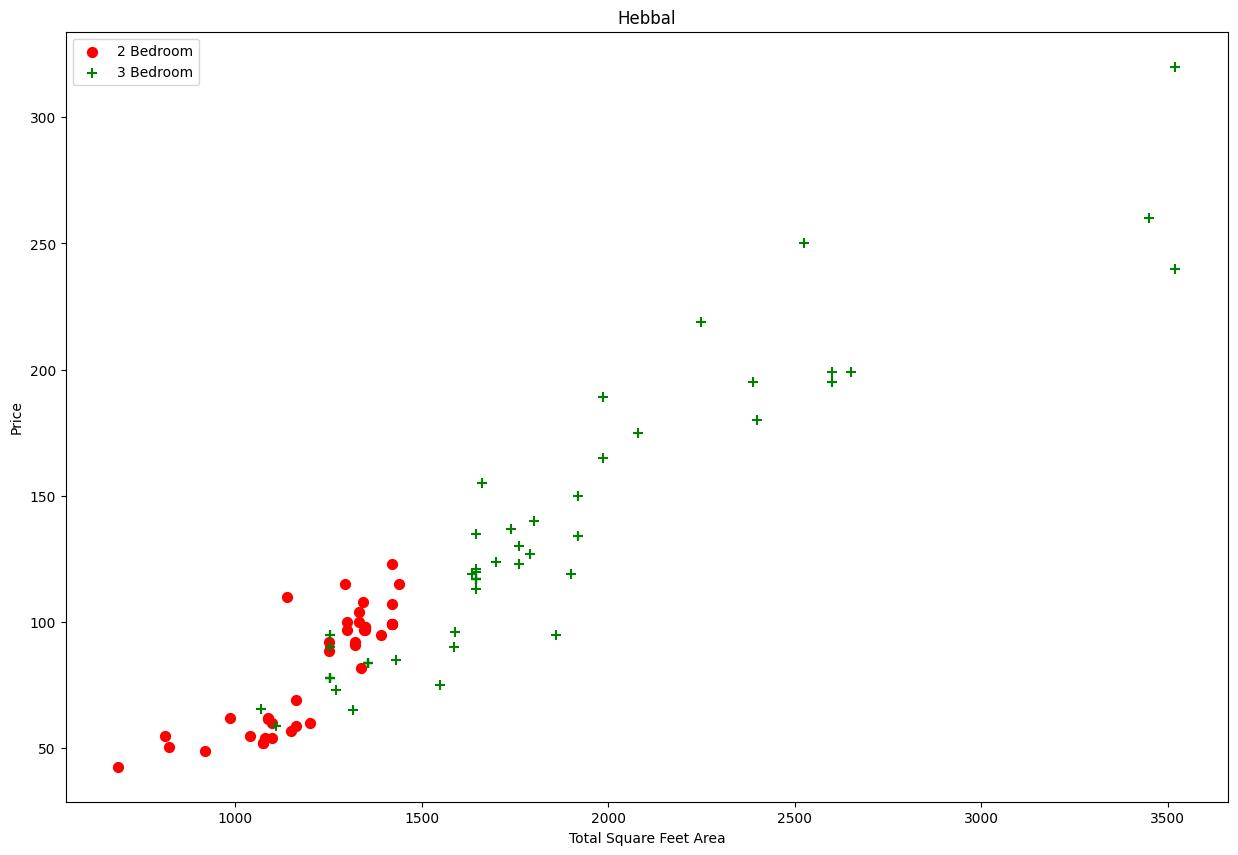

In [30]:
### **Simple Explanation of the Code**

#This function **plots a scatter chart** to compare the price of **2-bedroom and 3-bedroom houses** in a given location.



### **Step-by-Step Breakdown:**
# **Filter the data based on location and number of bedrooms**
  # - `Bedroom2`: Selects houses with **2 bedrooms** in the given `location`.
   #- `Bedroom3`: Selects houses with **3 bedrooms** in the given `location`.

#2. **Set figure size**
  # - `matplotlib.rcParams['figure.figsize'] = (15, 10)`:
   #  - Makes the graph bigger (**15 inches wide and 10 inches tall**).

#3. **Plot the scatter points**
  # - `plt.scatter(Bedroom2.total_sqft, Bedroom2.price, color='red', label='2 Bedroom', s=50)`:
  #  - **Red dots** represent **2-bedroom houses**.
  # - `total_sqft` (size of house) on **X-axis**.
  #   - `price` on **Y-axis**.
  # - `plt.scatter(Bedroom3.total_sqft, Bedroom3.price, marker='+', color='green', label='3 Bedroom', s=50)`:
  #   - **Green plus signs** represent **3-bedroom houses**.

 # 4. **Label the axes and add a title**
   #  - `plt.xlabel("Total Square Feet Area")`: Labels X-axis.
   # - `plt.ylabel("Price")`: Labels Y-axis.
   # - `plt.title(location)`: Title of the chart (shows location name).

 # 5. **Add a legend**
    # - `plt.legend()`: Displays labels for **2-bedroom (red)** and **3-bedroom (green)** houses.

#6. **Calling the function**
  # - `plot_scatter_chart(df7, "Hebbal")`:
   #  - Plots data for **Hebbal** using the dataset `df7`.



### **What the Chart Shows:**
#- **Red dots** = 2-bedroom houses.
#- **Green plus signs** = 3-bedroom houses.
#- Helps compare **price vs. house size** for different bedroom types.


def plot_scatter_chart(df,location):
  Bedroom2 = df[(df.location == location) & (df.Bedroom == 2)]
  Bedroom3 = df[(df.location == location) & (df.Bedroom == 3)]
  matplotlib.rcParams['figure.figsize'] = (15, 10)
  plt.scatter(Bedroom2.total_sqft,Bedroom2.price,color='red',label='2 Bedroom',s=50)
  plt.scatter(Bedroom3.total_sqft,Bedroom3.price,marker='+',color='green',label='3 Bedroom',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7,"Hebbal")
plt.show()

In [31]:
#each location separately in the dataset.
#For each number of bedrooms, it calculates the average price per square foot and how much the prices vary.
#Then, it checks if homes with more bedrooms have a much lower price per square foot than expected.
#If a home’s price per square foot is lower than the average of homes with one less bedroom, it gets removed (but only if there are at least 5 similar homes for comparison).
#The cleaned data is saved in df8

def remove_Bedrooms_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    Bedroom_stats = {}
    for Bedroom, Bedroom_df in location_df.groupby('Bedroom'):
      Bedroom_stats[Bedroom] = {
          'mean':np.mean(Bedroom_df.price_per_sqft),
          'std':np.std(Bedroom_df.price_per_sqft),
          'count': Bedroom_df.shape[0]
      }
    for Bedroom, Bedroom_df in location_df.groupby('Bedroom'):
      stats = Bedroom_stats.get(Bedroom-1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices,Bedroom_df[Bedroom_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis = 'index')

df8 = remove_Bedrooms_outliers(df7)
df8.shape

(7329, 7)

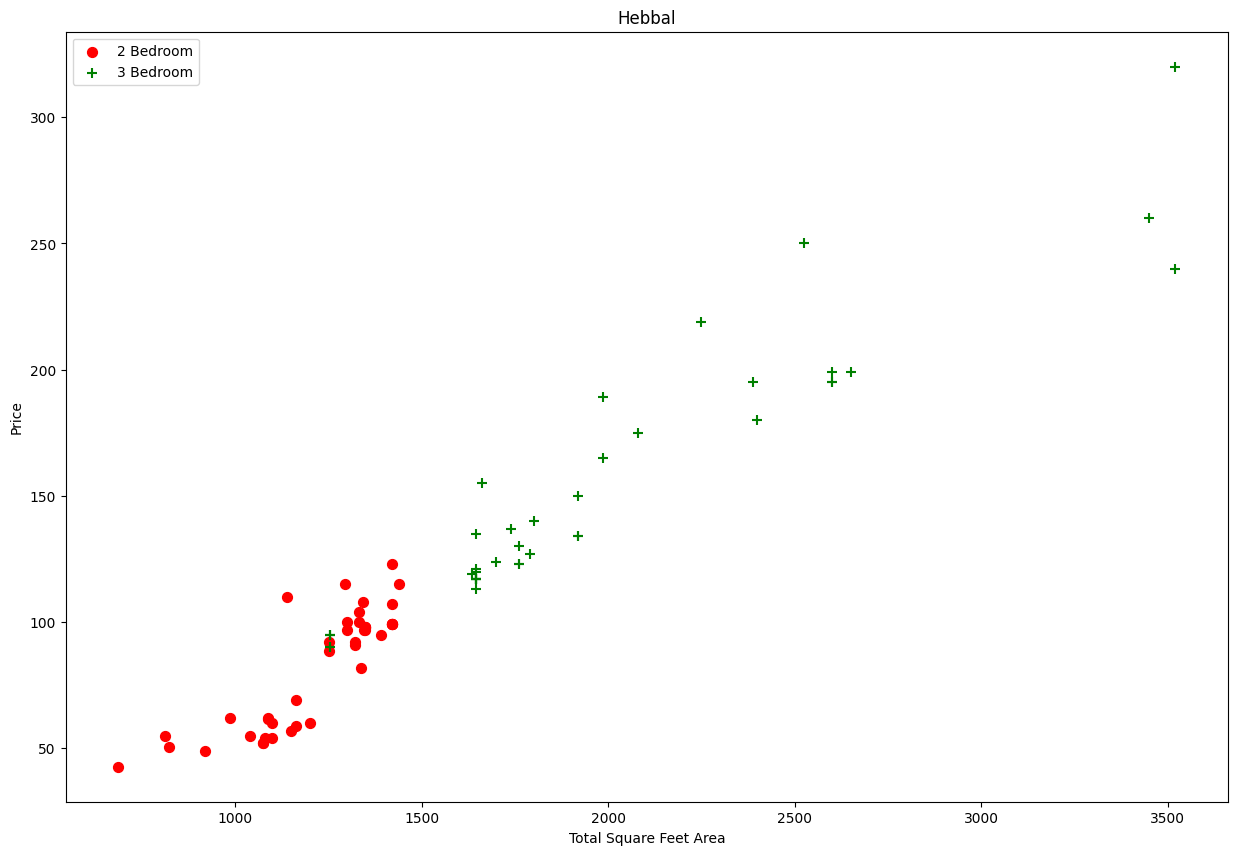

In [32]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

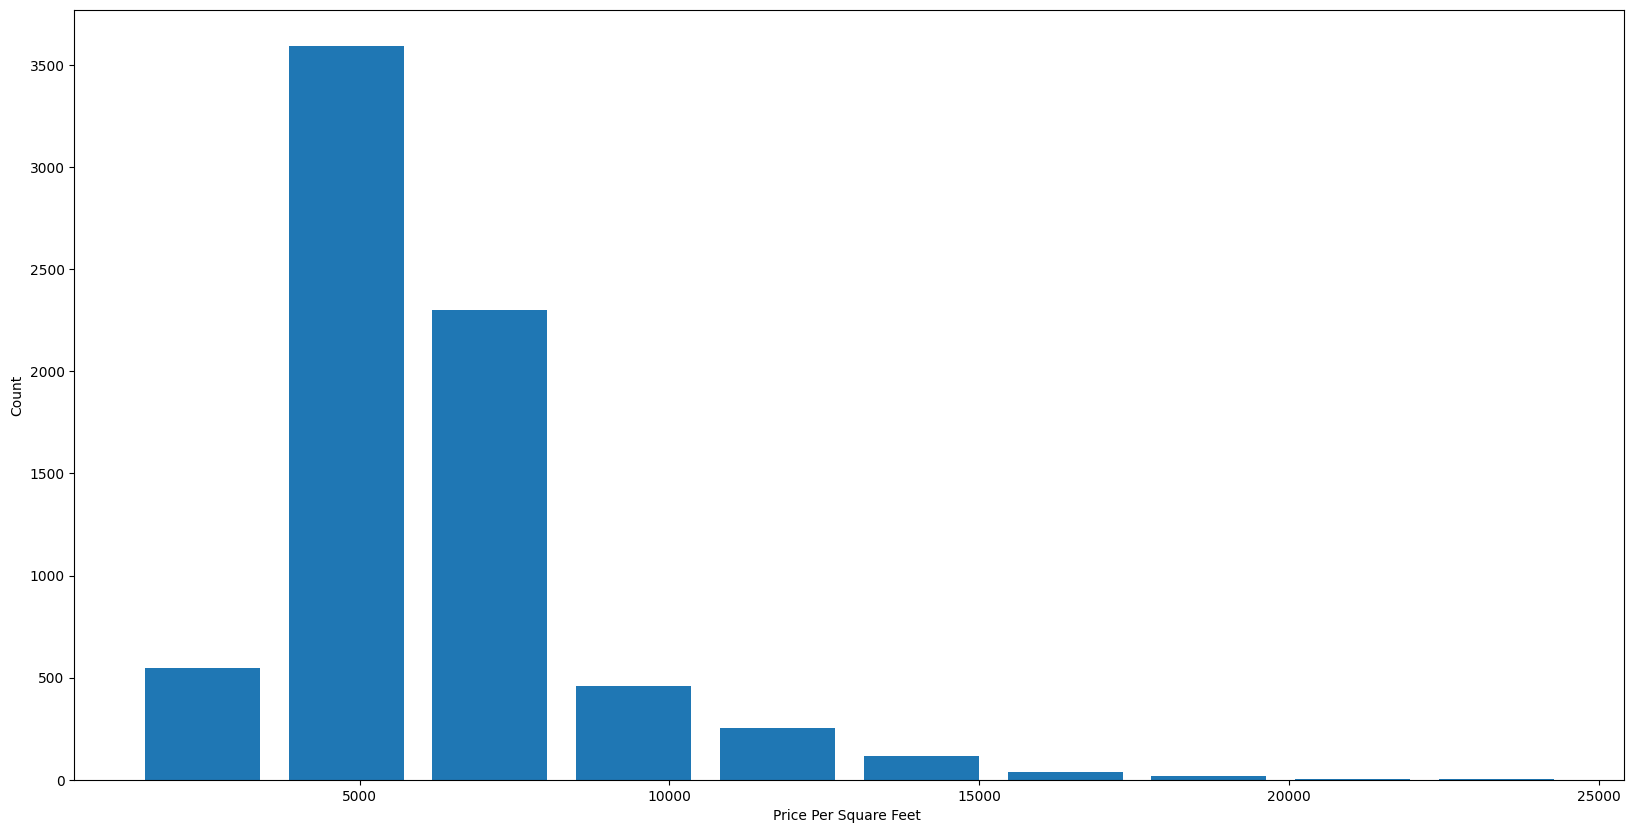

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet ')
plt.ylabel("Count")

In [34]:
#lists all the different numbers of bathrooms that appear in the dataset.

df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [35]:
#displays houses that have more than 10 bathrooms

df8[df8.bath>10]

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

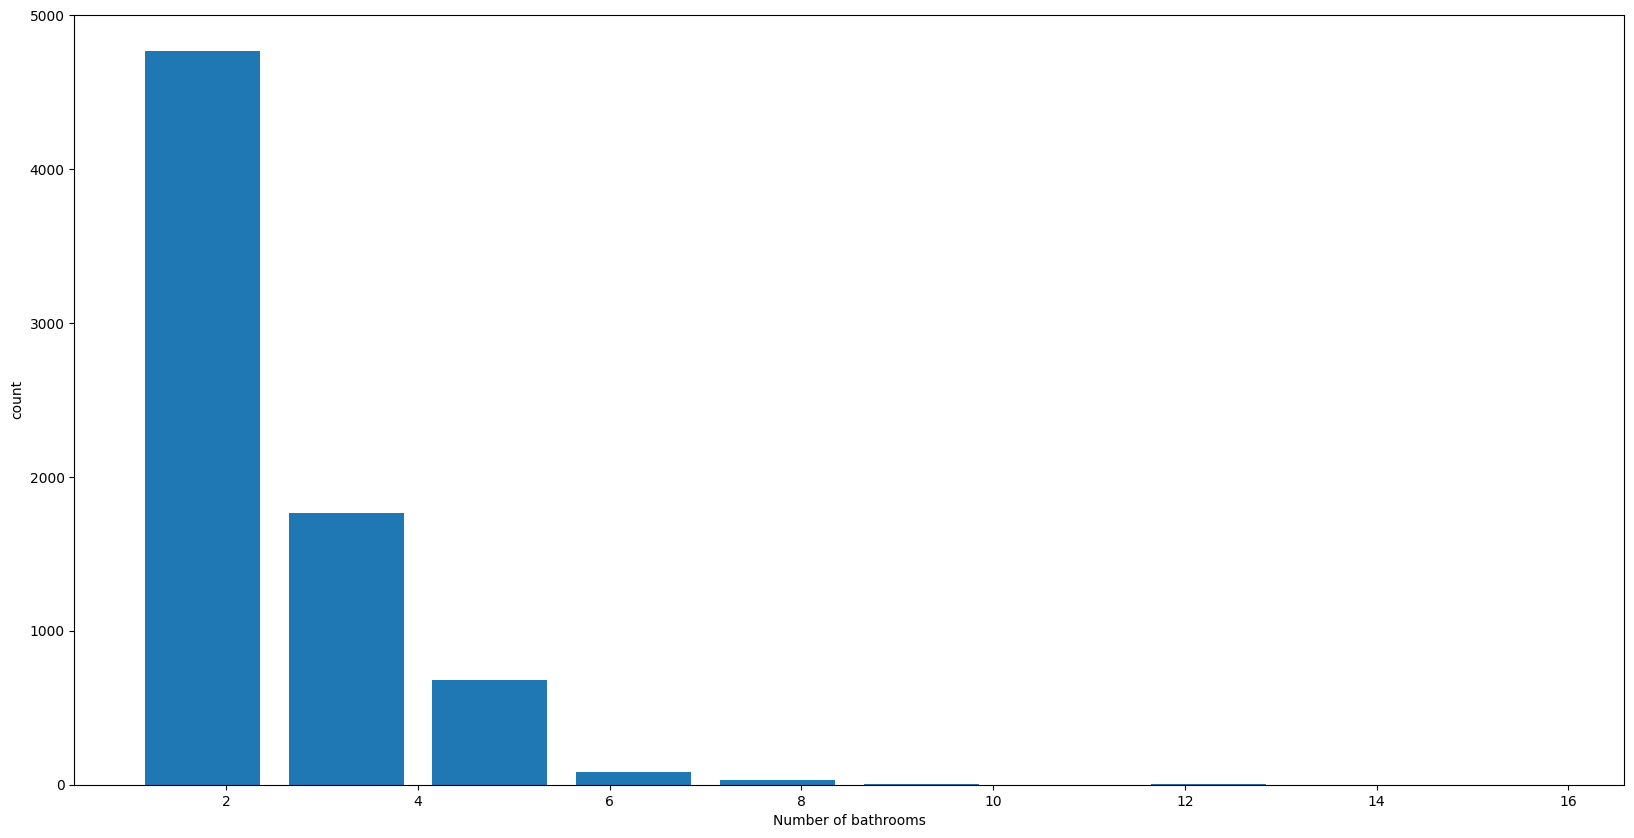

In [36]:
#creates a bar chart that shows how many houses have 1, 2, 3, or more bathrooms.

plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [37]:
#finds houses where there are too many bathrooms compared to bedrooms (more than 2 extra bathrooms)

df8[df8.bath > df8.Bedroom+2]

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
#selects rows where the number of bathrooms (bath) is less than the number of bedrooms (Bedroom) plus 2.
#The filtered data is stored in df9.
#df9.shape returns the number of rows and columns in df9

df9 = df8[df8.bath < df8.Bedroom+2]
df9.shape

(7251, 7)

In [40]:
#Drops the 'size' and 'price_per_sqft' columns from df9
          #axis='columns' means it removes entire columns (not rows)
#Stores the modified DataFrame in df10
#Displays the first 3 rows of df10 using .head(3)

df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,Bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [41]:
#pd.get_dummies(df10.location)
  #Converts the location column (which contains categorical values) into multiple binary (0 or 1) columns.
#Each unique location gets its own column.
#If a row had that location, the column value is 1; otherwise, it's 0.
#Stores the result in dumies, which is a new DataFrame with only the encoded location columns.
#dumies.head(3)
  #Displays the first 3 rows of the new DataFrame

dumies = pd.get_dummies(df10.location)
dumies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#Stores the result in df11, which will now contain all the columns from df10 plus the new one-hot encoded columns from dumies
df11 = pd.concat([df10,dumies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
#drop location column and cretae new df12
df12 = df11.drop("location",axis='columns')
df12.head(2)

,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df12.shape

(7251, 245)

In [45]:
#Stores the result in X, which now contains all columns except 'price'
#X will be used as the input (features) for a machine learning model
#X.head() displays the first 5 rows of X

X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
#df12.price → Selects the price column from df12
#y = df12.price → Saves this column as y
#y.head() → Shows the first 5 values from y

y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [47]:
#train_test_split(X, y, test_size=0.2, random_state=10)
  #Splits X (features) and y (target/labels) into training and testing sets
  #test_size=0.2 → 20% of the data is used for testing, 80% for training
  #random_state=10 → Ensures the split is the same every time you run the code

#The output is stored in four variables:
  #X_train → Training data (features)
  #X_test → Testing data (features)
  #y_train → Training data (target)
  #y_test → Testing data (target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
#LinearRegression() → Creates a linear regression model (lr_clf).
#lr_clf.fit(X_train, y_train) → Trains the model using the training data (X_train, y_train).
#lr_clf.score(X_test, y_test) → Measures how well the model predicts y_test using X_test. The score is the R² (R-squared) value, which shows how well the model fits the test data.
#Closer to 1 → Good prediction.
#Closer to 0 → Poor prediction.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874374

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import pandas as pd


def find_best_model_using_gridsearchcv(X,y) :
  algos = {
    'linear_regression' : {
      'model' : LinearRegression(),
      'params' : {}
    },
    'lasso' : {
      'model':Lasso(),
      'params' : {
        'alpha' : [1,2],
        'selection' : ['random' , 'cyclic']
      }
    },
    'decision_tree' : {
      'model' : DecisionTreeRegressor(),
      'params':{
        #mse
        'criterion':['squared_error','friedman_mse'],
        'splitter':['best','random']
      }
    }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
      'model':algo_name,
      'best_score': gs.best_score_,
      'best_params':gs.best_params_
    })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.727171,"{'criterion': 'squared_error', 'splitter': 'be..."


In [51]:
X.columns

Index(['total_sqft', 'bath', 'Bedroom', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [52]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [53]:
def predict_price(location,sqft,bath,Bedroom):
  loc_index  = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = Bedroom
  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]

In [54]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677204199

In [55]:
predict_price('1st Phase JP Nagar',1000,2,3)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900780261

In [56]:
predict_price('Indira Nagar',1000,2,2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400642

In [57]:
predict_price('Indira Nagar',1000,3,3)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033173

In [58]:
import pickle
with open('banglore_home_prices_model.pickel','wb') as f:
  pickle.dump(lr_clf,f)

In [59]:
import json
columns = {
  'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))
